In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Load dataset

In [32]:
def load_data(file_path):
    """Load data from a CSV file."""
    return pd.read_csv(file_path)

In [33]:
pd.set_option('display.max_columns', None)
df = load_data("../data/Fraud Detection Dataset.csv")
df.head()

,Transaction_ID,User_ID,Transaction_Amount,Transaction_Type,Time_of_Transaction,Device_Used,Location,Previous_Fraudulent_Transactions,Account_Age,Number_of_Transactions_Last_24H,Payment_Method,Fraudulent
0,T1,4174,1292.76,ATM Withdrawal,16.0,Tablet,San Francisco,0,119,13,Debit Card,0
1,T2,4507,1554.58,ATM Withdrawal,13.0,Mobile,New York,4,79,3,Credit Card,0
2,T3,1860,2395.02,ATM Withdrawal,NaN,Mobile,NaN,3,115,9,NaN,0
3,T4,2294,100.10,Bill Payment,15.0,Desktop,Chicago,4,3,4,UPI,0
4,T5,2130,1490.50,POS Payment,19.0,Mobile,San Francisco,2,57,7,Credit Card,0


In [ ]:
obj = df.select_dtypes(include=["object"]).columns.tolist()
nums = df.select_dtypes(include=["number"]).columns.tolist()

print(f"Object dataset: {len(obj)}")
print(f"Number dataset: {len(nums)}")

Object dataset: ['Transaction_ID', 'Transaction_Type', 'Device_Used', 'Location', 'Payment_Method']
Number dataset: ['User_ID', 'Transaction_Amount', 'Time_of_Transaction', 'Previous_Fraudulent_Transactions', 'Account_Age', 'Number_of_Transactions_Last_24H', 'Fraudulent']


In [35]:
# Handle missing values
df.dropna(inplace=True)

In [36]:
df.head(7)

,Transaction_ID,User_ID,Transaction_Amount,Transaction_Type,Time_of_Transaction,Device_Used,Location,Previous_Fraudulent_Transactions,Account_Age,Number_of_Transactions_Last_24H,Payment_Method,Fraudulent
0,T1,4174,1292.76,ATM Withdrawal,16.0,Tablet,San Francisco,0,119,13,Debit Card,0
1,T2,4507,1554.58,ATM Withdrawal,13.0,Mobile,New York,4,79,3,Credit Card,0
3,T4,2294,100.10,Bill Payment,15.0,Desktop,Chicago,4,3,4,UPI,0
4,T5,2130,1490.50,POS Payment,19.0,Mobile,San Francisco,2,57,7,Credit Card,0
5,T6,2095,2372.04,ATM Withdrawal,15.0,Desktop,Boston,3,96,14,Credit Card,0
6,T7,4772,544.81,Bill Payment,2.0,Tablet,Boston,3,6,9,UPI,1
7,T8,4092,635.75,ATM Withdrawal,13.0,Tablet,Boston,2,13,10,Debit Card,0


In [37]:
df.describe()

,User_ID,Transaction_Amount,Time_of_Transaction,Previous_Fraudulent_Transactions,Account_Age,Number_of_Transactions_Last_24H,Fraudulent
count,39583.000000,39583.000000,39583.000000,39583.000000,39583.000000,39583.000000,39583.000000
mean,3006.252785,2995.273051,11.459617,1.995528,59.944471,7.495541,0.048809
std,1154.046550,5050.702270,6.912935,1.414340,34.321202,4.017372,0.215471
min,1000.000000,5.030000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,2009.000000,1267.435000,5.000000,1.000000,30.000000,4.000000,0.000000
50%,2993.000000,2521.670000,11.000000,2.000000,60.000000,7.000000,0.000000
75%,4009.000000,3781.080000,17.000000,3.000000,90.000000,11.000000,0.000000
max,4999.000000,49997.800000,23.000000,4.000000,119.000000,14.000000,1.000000


In [38]:
startup_df = load_data("../data/startup_data.csv")
startup_df.head()

,Startup Name,Industry,Funding Rounds,Funding Amount (M USD),Valuation (M USD),Revenue (M USD),Employees,Market Share (%),Profitable,Year Founded,Region,Exit Status
0,Startup_1,IoT,1,101.09,844.75,67.87,1468,5.20,0,2006,Europe,Private
1,Startup_2,EdTech,1,247.62,3310.83,75.65,3280,8.10,1,2003,South America,Private
2,Startup_3,EdTech,1,109.24,1059.37,84.21,4933,2.61,1,1995,South America,Private
3,Startup_4,Gaming,5,10.75,101.90,47.08,1059,2.53,0,2003,South America,Private
4,Startup_5,IoT,4,249.28,850.11,50.25,1905,4.09,0,1997,Europe,Acquired


## Goals project

* Fraud detection
* Assesment risk

# Data encoding

In [39]:
# Encoding data on categorical features
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
categorical_columns = df.select_dtypes(include=['object']).columns
# Iterate through each categorical column and apply label encoding
for col in categorical_columns:
    df[col] = le.fit_transform(df[col])

In [40]:
df.isnull().sum()

Transaction_ID                      0
User_ID                             0
Transaction_Amount                  0
Transaction_Type                    0
Time_of_Transaction                 0
Device_Used                         0
Location                            0
Previous_Fraudulent_Transactions    0
Account_Age                         0
Number_of_Transactions_Last_24H     0
Payment_Method                      0
Fraudulent                          0
dtype: int64

<Axes: >

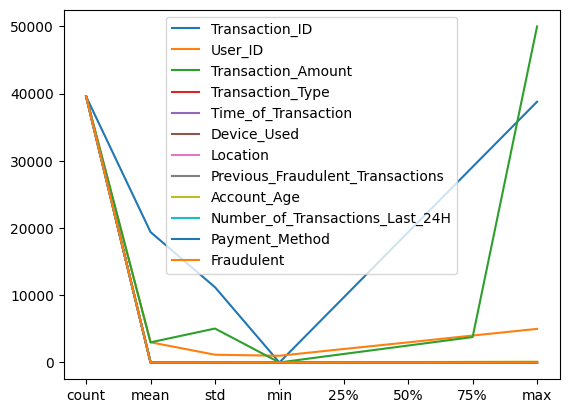

In [41]:
df.describe().plot()

# Minmaxscaler data handling

In [42]:
# Minmaxscaler data handling
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df_scaled.head()

,Transaction_ID,User_ID,Transaction_Amount,Transaction_Type,Time_of_Transaction,Device_Used,Location,Previous_Fraudulent_Transactions,Account_Age,Number_of_Transactions_Last_24H,Payment_Method,Fraudulent
0,0.000000,0.793698,0.025758,0.0,0.695652,0.666667,0.857143,0.00,1.000000,0.923077,0.25,0.0
1,0.224823,0.876969,0.030995,0.0,0.565217,0.333333,0.714286,1.00,0.661017,0.153846,0.00,0.0
2,0.666271,0.323581,0.001902,0.5,0.652174,0.000000,0.142857,1.00,0.016949,0.230769,1.00,0.0
3,0.887537,0.282571,0.029714,1.0,0.826087,0.333333,0.857143,0.50,0.474576,0.461538,0.00,0.0
4,0.909963,0.273818,0.047347,0.0,0.652174,0.000000,0.000000,0.75,0.805085,1.000000,0.00,0.0
